<a href="https://colab.research.google.com/github/Aapugithub/hello-world/blob/master/Task1_Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Genre Classification

Sutirtha Mukherjee \
14/11/2023

## Contents
- [Project Overview and Objective](#project-overview-and-objective)
- [Importing Libraries](#importing-libraries)
- [Load Data](#load-data)
- [Data Cleaning](#data-cleaning)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing for Modelling](#data-preprocessing-for-modelling)
- [Machine Learning Models](#machine-learning-models)
- [Conclusions](#conclusions)

## Project overview and objective  <a id="project-overview-and-objective"></a>

In this machine learning (ML) project, our primary objective is to develop an ML model capable of predicting the genre of a movie based on its textual information. We will use natural language processing techniques and classification algorithms to achieve this goal.

Specifically we are going to:
1. Use text processing techniques such as TF-IDF to transform textual data into numerical vectors suitable for machine learning.   

2. Employ classification algorithms, such as Naive Bayes, Logistic Regression, Support Vector Machines, Random Forest etc. to identify the best model for our objective.

3. Maximize the model's performance by conducting exploratory data analysis, feature engineering and fine-tuning hyperparameters.



## Importing Libraries <a id="importing-libraries"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate,StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.dummy import DummyClassifier

from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score,roc_curve,make_scorer

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Load data <a id="load-data"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Datasets are taken from Kaggle.
The corresponding link is - https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/  

### Data for training ML models

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoftInternship/MovieGenrePrediction/train_data.txt",
                         sep=":::",engine='python',header=None)

In [ ]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.columns = ['id','title','genre','description']

### Data for testing ML models

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/CodSoftInternship/MovieGenrePrediction/test_data_solution.txt",
                        sep=":::",engine='python',header=None,
                       names=['id','title','genre','description'])
test_data.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


## Data cleaning <a id="data-cleaning"></a>

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


#### Checking duplicated rows

In [ ]:
train_data.duplicated().sum()

0

- There are no duplicated rows.

#### Checking null values

In [ ]:
train_data.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

It looks like there is no missing value in the datasets. Although, they might be hidden inside string data-type, which will be taken care off during text preprocessing.

## Exploratory Data Analysis <a id="exploratory-data-analysis"></a>

In [ ]:
train_data.genre[0]

' drama '

In [ ]:
train_data.genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [ ]:
print(f"Number of unique genres : {len(train_data.genre.unique())}")

Number of unique genres : 27


### The Target Imbalanace

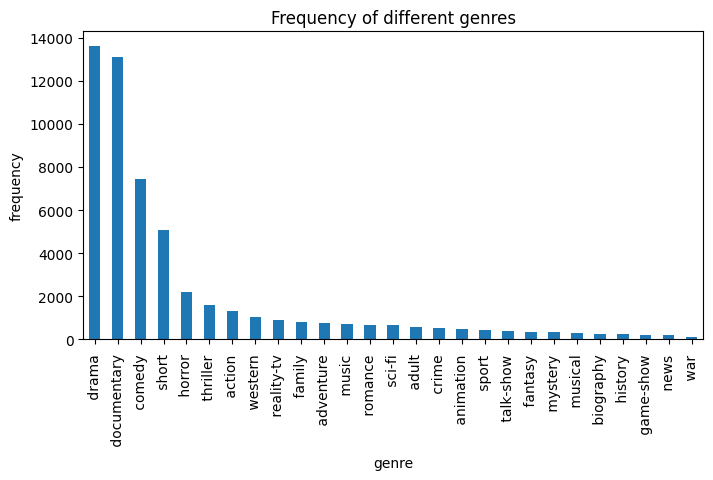

In [ ]:
plt.figure(figsize=(8,4))
train_data.genre.value_counts().plot(kind='bar')
plt.title("Frequency of different genres")
plt.ylabel("frequency")
plt.xlabel("genre")
plt.show()

- Cumulative percentage :

In [ ]:
genre_counts = train_data['genre'].value_counts()

# Compute cumulative percentage
cumulative_percent = genre_counts.cumsum() / genre_counts.sum() * 100

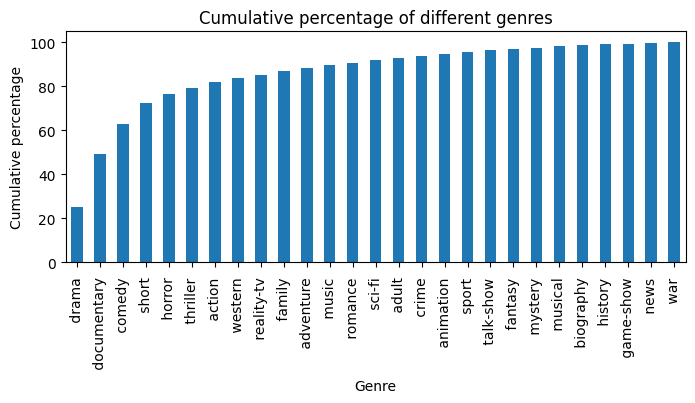

In [ ]:
plt.figure(figsize=(8,3))
cumulative_percent.plot(kind='bar')
plt.title("Cumulative percentage of different genres")
plt.xlabel("Genre")
plt.ylabel("Cumulative percentage")
plt.show()

The dataset exhibits a noticeable imbalance in the frequency of different genres. To address this imbalance and improve the performance of our machine learning model, it is crucial to adjust the class weights during the training process and/or consider data resampling.

## Data Preprocessing for Modelling <a id="data-preprocessing-for-modelling"></a>

- Combining 'title' and 'description' into a single text column :

In [ ]:
train_data["textual_info"] = train_data.title+" "+train_data.description

In [ ]:
train_data.drop(columns=['title','description'],inplace=True)

In [ ]:
train_data.textual_info#.apply(lambda x:x.lower())

0         Oscar et la dame rose (2009)   Listening in t...
1         Cupid (1997)   A brother and sister with a pa...
2         Young, Wild and Wonderful (1980)   As the bus...
3         The Secret Sin (1915)   To help their unemplo...
4         The Unrecovered (2007)   The film's title ref...
                               ...                        
54209     "Bonino" (1953)   This short-lived NBC live s...
54210     Dead Girls Don't Cry (????)   The NEXT Genera...
54211     Ronald Goedemondt: Ze bestaan echt (2008)   Z...
54212     Make Your Own Bed (1944)   Walter and Vivian ...
54213     Nature's Fury: Storm of the Century (2006)   ...
Name: textual_info, Length: 54214, dtype: object

In [ ]:
test_data["textual_info"] = test_data.title+" "+test_data.description

In [ ]:
test_data.drop(columns=['title','description'],inplace=True)

In [ ]:
test_data.textual_info

0         Edgar's Lunch (1998)   L.R. Brane loves his l...
1         La guerra de papá (1977)   Spain, March 1964:...
2         Off the Beaten Track (2010)   One year in the...
3         Meu Amigo Hindu (2015)   His father has died,...
4         Er nu zhai (1955)   Before he was known inter...
                               ...                        
54195     "Tales of Light & Dark" (2013)   Covering mul...
54196     Der letzte Mohikaner (1965)   As Alice and Co...
54197     Oliver Twink (2007)   A movie 169 years in th...
54198     Slipstream (1973)   Popular, but mysterious r...
54199     Curitiba Zero Grau (2010)   Curitiba is a cit...
Name: textual_info, Length: 54200, dtype: object

- Seperating input features and target labels :

In [ ]:
X_train = train_data["textual_info"]
y_train = train_data["genre"]

In [ ]:
X_train.shape, y_train.shape

((54214,), (54214,))

In [ ]:
X_test = test_data["textual_info"]
y_test = test_data["genre"]

In [ ]:
X_test.shape, y_test.shape

((54200,), (54200,))

### Text Preprocessing Pipeline

In [ ]:
import re

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Tokenization, Stemming, Vectorization etc.

In [ ]:
#Custom transformer that combines the text-preprocessing steps
class TextPreprocessor:
    def __init__(self):
        self.stemmer = PorterStemmer()
        # self.lemmatizer = WordNetLemmatizer()

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        processed_text = []
        for text in X:
            # Removing website, punctuation, and numbers
            text = text.lower()
            text = re.sub(r'http[s]?://\S+|www\.\S+|\S+\.com\S*','',text) #Remove website
            text = re.sub(r'[^\w\s]', '', text) # Remove punctuations
            text = re.sub(r'\d', '', text)  # Remove numbers

            # Tokenization and stemming
            tokens = word_tokenize(text)
            stemmed_tokens = [self.stemmer.stem(token) for token in tokens]
            processed_text.append(' '.join(stemmed_tokens))

            # Tokenization, Stemming and Lemmatization
            # tokens = word_tokenize(text)
            # lemmatized_tokens = [self.stemmer.stem(self.lemmatizer.lemmatize(token)) for token in tokens]
            # processed_text.append(' '.join(lemmatized_tokens))

        return processed_text

In [ ]:
preprocessor = TextPreprocessor()
tfidf = TfidfVectorizer(max_features=5000,stop_words='english',lowercase=True)

preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tfidf', tfidf)
])

In [ ]:
X_train_tfidf = preprocessing_pipeline.fit_transform(X_train)

In [ ]:
#tfidf vocabulary
#tfidf.vocabulary_.keys()

In [ ]:
X_train_tfidf

<54214x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2106656 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf =  preprocessing_pipeline.transform(X_test)

In [ ]:
X_test_tfidf

<54200x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2106716 stored elements in Compressed Sparse Row format>

### Sampling

In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# sampler = RandomOverSampler(sampling_strategy='auto',random_state=42)
# X_train_tfidf,y_train = sampler.fit_resample(X_train_tfidf,y_train)

In [ ]:
# smote = SMOTE(sampling_strategy=0.01, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# sampler = RandomUnderSampler(sampling_strategy=[],random_state=42)
# X_train,y_train = sampler.fit_resample(X_train,y_train)

 I have checked both oversampling and undersampling, but ended up with overfitting or underfitting. Instead, by employing cost-sensitive learning through the 'class_weight' setting in the estimators, I obtained better results.

## Machine Learning Models <a id="machine-learning-models"></a>

This is a supervised classification problem. We will construct machine learning models and select the one with the best f1-score and accuracy.

- Function for Computing Evaluation Metrics :

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)
def evaluate_metrics(model,X_train_tfidf,y_train,X_test_tfidf,y_test):

    y_train_pred = model.predict(X_train_tfidf)

    y_test_pred = model.predict(X_test_tfidf)

    print(f"Train accuracy : {accuracy_score(y_train,y_train_pred):.2f}")
    print(f"Test accuracy : {accuracy_score(y_test,y_test_pred):.2f}\n")

    print(f"Train macro f1 score : {f1_score(y_train,y_train_pred,average='macro'):.2f}")
    print(f"Test macro f1 score : {f1_score(y_test,y_test_pred,average='macro'):.2f}\n")

    print()
    #For test data only

    print("\nClassification report for test data:\n")
    print(classification_report(y_test,y_test_pred))
    print("\nConfusion matrix for test data:")
    print("(normalized along rows)")
    dsp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=model.classes_,normalize='true',values_format=".0%")
    plt.xticks(rotation=90)
    plt.show()


- Function for Cross-Validation :

In [ ]:
def cv_scores(best_model,X,y):
    print("Cross validation scores of the model with best hyperparameters:\n")
    scoring = {'macro_f1': 'f1_macro',"accuracy":'accuracy'}
    stratified_cv = StratifiedKFold(n_splits=5)
    results = cross_validate(best_model, X, y, cv=stratified_cv, scoring=scoring)
    print(f"macro f1 : mean = {round(results['test_macro_f1'].mean(),3)}, std deviation = {round(results['test_macro_f1'].std(),3)}")
    print(f"accuracy : mean = {round(results['test_accuracy'].mean(),3)}, std deviation = {round(results['test_accuracy'].std(),3)}")

### Baseline Model using DummyClassifier

In [ ]:
hyp_params = {"strategy" : ["most_frequent", "prior", "stratified", "uniform"]}

#For best result
hyp_params = {"strategy" : ["stratified"]}

model = GridSearchCV(DummyClassifier(random_state = 42),
                     param_grid=hyp_params,cv=5,n_jobs=-1,verbose=1,scoring="accuracy")
model.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DummyClassifier(random_state=42), n_jobs=-1,
             param_grid={'strategy': ['stratified']}, scoring='accuracy',
             verbose=1)

- Cross Validation scores :

In [ ]:
model.best_params_

{'strategy': 'stratified'}

In [ ]:
dummy_clf = DummyClassifier(strategy= 'stratified',random_state = 42)
cv_scores(dummy_clf,X_train_tfidf,y_train)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.037, std deviation = 0.001
accuracy : mean = 0.155, std deviation = 0.003


### Logistic Regression

#### Hyperparameter Tuning

We are utilizing Grid Search cross-validation to fine-tune the hyperparameters of our machine learning models. Grid Search allows us to systematically explore various combinations of hyperparameters to optimize the model's performance.

In [ ]:
#Finding best hyper parameters using grid search cross-validation

##following section is used to obtain the best hyperparameters

hyp_params = [{"penalty":["l2"],"C":[0.1,1.0],"solver":['lbfgs']},
              {"penalty":["l1","l2"],"C":[0.1,1.0],"solver":['liblinear']}
              ]

##following set of hyperparameter produces the best result
#hyp_params = {'C': [1], 'penalty': ['l2'], 'solver': ['liblinear']}

stratified_cv = StratifiedKFold(n_splits=5)
log_reg = LogisticRegression(class_weight='balanced')
model = GridSearchCV(log_reg,
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

It's worth noting that, because "accuracy" is not a very reliable measure for classifying instances in imbalanced datasets, I have chosen the macro-averaged f1-score as the primary metric for cross-validation scoring.

In [ ]:
model.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=3,
             param_grid=[{'C': [0.1, 1.0], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1.0], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

- Cross Validation scores :

In [ ]:
best_model = LogisticRegression(C=1.0,penalty='l2',solver='liblinear',random_state=42,
                                max_iter=10000,class_weight="balanced")
cv_scores(best_model,X_train_tfidf,y_train)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.364, std deviation = 0.002
accuracy : mean = 0.518, std deviation = 0.003


#### Evaluation Metrics

In [ ]:
log_reg_final = best_model
log_reg_final.fit(X_train_tfidf,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='liblinear')

In [ ]:
y_train_pred = model.predict(X_train_tfidf)

y_test_pred = model.predict(X_test_tfidf)

print(f"Train accuracy : {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Test accuracy : {accuracy_score(y_test,y_test_pred):.2f}\n")

print(f"Train macro f1 score : {f1_score(y_train,y_train_pred,average='macro'):.2f}")
print(f"Test macro f1 score : {f1_score(y_test,y_test_pred,average='macro'):.2f}\n")


#For test data only

print("\nClassification report for test data:\n")
print(classification_report(y_test,y_test_pred))


Train accuracy : 0.64
Test accuracy : 0.52

Train macro f1 score : 0.59
Test macro f1 score : 0.37


Classification report for test data:

               precision    recall  f1-score   support

      action        0.36      0.46      0.40      1314
       adult        0.35      0.63      0.45       590
   adventure        0.25      0.33      0.28       775
   animation        0.17      0.28      0.21       498
   biography        0.05      0.12      0.07       264
      comedy        0.62      0.48      0.54      7446
       crime        0.16      0.35      0.22       505
 documentary        0.77      0.67      0.71     13096
       drama        0.69      0.49      0.57     13612
      family        0.18      0.29      0.22       783
     fantasy        0.13      0.30      0.18       322
   game-show        0.51      0.73      0.60       193
     history        0.08      0.20      0.11       243
      horror        0.58      0.68      0.62      2204
       music        0.42      0.69 

This machine learning model performs significantly better than the baseline model. However, it is important to note that, for the test data, the accuracy and macro F1-score remain relatively low at 0.52 and 0.37, respectively. One possible reason for very low accuracy and F1 scores could be the large number of target classes, 27 in total.

 The genre feature consists of various sub-genres within the broader movie genres. After conducting some domain research, I have chosen to reorganize all the genres into six main categories, aiming for improved classification results without significant information loss. The categories are described in the following section.

### Feature Engineering: Simplifying Genre Classes

In [ ]:
documentary_group_genres = [' documentary ',' biography ',' history ',' news ',' sport ',
                            ' talk-show ',' reality-tv ',' game-show ',' short ']
entertainment_group_genres = [' comedy ',' animation ',' music ',' musical ',' family ']
action_group_genres = [' adventure ',' action ', ' fantasy ',' sci-fi ',' western ',' war ' ]
drama_group_genres = [' drama ',' romance ',' adult ']
thriller_group_genres = [' thriller ',' crime ',' mystery ' ]
horror_group_genres = [' horror ']

y_train_regrouped = y_train.replace(documentary_group_genres,'documentary-reality group')
y_train_regrouped = y_train_regrouped.replace(entertainment_group_genres,'humor-entertainment group')
y_train_regrouped = y_train_regrouped.replace(action_group_genres,'action-adventure group')
y_train_regrouped = y_train_regrouped.replace(drama_group_genres,'drama group')
y_train_regrouped = y_train_regrouped.replace(thriller_group_genres,'thriller group')
y_train_regrouped = y_train_regrouped.replace(horror_group_genres,'horror group')

y_test_regrouped = y_test.replace(documentary_group_genres,'documentary-reality group')
y_test_regrouped = y_test_regrouped.replace(entertainment_group_genres,'humor-entertainment group')
y_test_regrouped = y_test_regrouped.replace(action_group_genres,'action-adventure group')
y_test_regrouped = y_test_regrouped.replace(drama_group_genres,'drama group')
y_test_regrouped = y_test_regrouped.replace(thriller_group_genres,'thriller group')
y_test_regrouped = y_test_regrouped.replace(horror_group_genres,'horror group')

- Here, I have reorganized all the genres into six main categories. While this grouping is far from perfect, a more careful investigation can produce better results. Nevertheless, the modified genres are as follows:

In [ ]:
gnrs = [thriller_group_genres,documentary_group_genres,drama_group_genres,entertainment_group_genres,horror_group_genres,action_group_genres]
groups = ['thriller group','documentary-reality group','drama group','humor-entertainment group','horror group','action-adventure group']
for g in zip(groups,gnrs):
  print(f"Genres in {g[0]:25} : {g[1]}")

Genres in thriller group            : [' thriller ', ' crime ', ' mystery ']
Genres in documentary-reality group : [' documentary ', ' biography ', ' history ', ' news ', ' sport ', ' talk-show ', ' reality-tv ', ' game-show ', ' short ']
Genres in drama group               : [' drama ', ' romance ', ' adult ']
Genres in humor-entertainment group : [' comedy ', ' animation ', ' music ', ' musical ', ' family ']
Genres in horror group              : [' horror ']
Genres in action-adventure group    : [' adventure ', ' action ', ' fantasy ', ' sci-fi ', ' western ', ' war ']


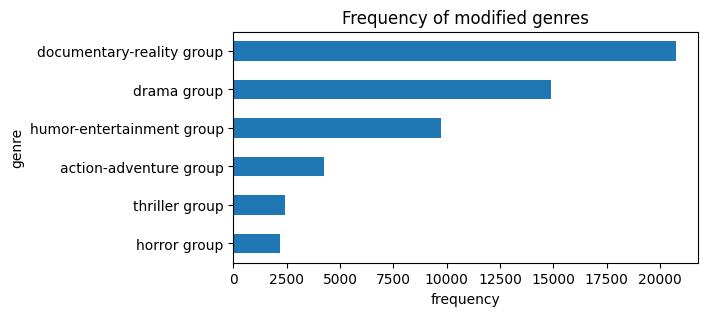

In [ ]:
plt.figure(figsize=(6,3))
y_train_regrouped.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title("Frequency of modified genres")
plt.xlabel("frequency")
plt.ylabel("genre")
plt.show()

### Modelling with Modified Genre Classes

#### Hyperparameter Tuning

In [ ]:
#Finding best hyper parameters using grid search cross-validation

##following section is used to obtain the best hyperparameters
hyp_params = [{"penalty":["l2"],"C":[0.1,1.0],"solver":['lbfgs']},
              {"penalty":["l1","l2"],"C":[0.1,1.0],"solver":['liblinear']}
              ]

##following set of hyperparameter produces the best result
hyp_params = {'C': [1], 'penalty': ['l2'], 'solver': ['liblinear']}

stratified_cv = StratifiedKFold(n_splits=5)
#log_reg = LogisticRegression(class_weight='balanced',random_state=42)
model = GridSearchCV(log_reg,
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train_tfidf,y_train_regrouped)
model.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

- Cross Validation scores :

In [ ]:
best_model =  LogisticRegression(C=1,penalty='l2',solver= 'liblinear',class_weight='balanced',random_state=42)
cv_scores(best_model,X_train_tfidf,y_train_regrouped)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.602, std deviation = 0.005
accuracy : mean = 0.668, std deviation = 0.005


#### Evaluation Metrics

In [ ]:
log_reg_final = best_model
log_reg_final.fit(X_train_tfidf,y_train_regrouped)

LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='liblinear')

Train accuracy : 0.74
Test accuracy : 0.67

Train macro f1 score : 0.70
Test macro f1 score : 0.60



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.55      0.63      0.58      4221
documentary-reality group       0.80      0.78      0.79     20754
              drama group       0.66      0.64      0.65     14874
             horror group       0.56      0.69      0.62      2204
humor-entertainment group       0.60      0.58      0.59      9734
           thriller group       0.33      0.42      0.37      2413

                 accuracy                           0.67     54200
                macro avg       0.59      0.62      0.60     54200
             weighted avg       0.68      0.67      0.67     54200


Confusion matrix for test data:
(normalized along rows)


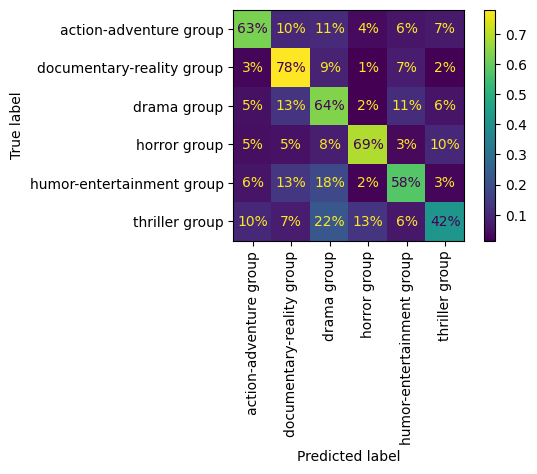

In [ ]:
evaluate_metrics(log_reg_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

- With the reduced number of classes, we have achieved an improved overall accuracy of 67% and a macro-average F1 score of 0.60. Moving forward, we will utilize these modified genre classes for ML modeling. Furthermore,  we will explore other relevant ML algorithms to further enhance our results.

### Naive Bayes Classifier

#### Hyperparameter Tuning

In [ ]:
#Finding best hyper parameters using grid search cross-validation

##The best hyperparameters are decided from the following list
hyp_params = {'alpha': [0.1, 0.5, 1.0, 5.0],
             }

##following set of hyperparameter produces the best result
hyp_params = {'alpha': [0.5]}

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(MultinomialNB(),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")


In [ ]:
##adjusting class weights for imbalanced labels
class_weights = compute_sample_weight(class_weight='balanced',y=y_train_regrouped)
##fitting
model.fit(X_train_tfidf,y_train_regrouped,sample_weight=class_weights)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(), n_jobs=3, param_grid={'alpha': [0.5]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'alpha': 0.5}

- Cross Validation Score:

In [ ]:
print("Cross validation score for the best model:\n")
print(f"Mean score: {model.cv_results_['mean_test_score'][0]:.2f}")
print(f"Standard deviation: {model.cv_results_['std_test_score'][0]:.3f}")

Cross validation score for the best model:

Mean score: 0.57
Standard deviation: 0.004


#### Evaluation Metrics

In [ ]:
naive_bayes_final = MultinomialNB(alpha = 0.5)
naive_bayes_final.fit(X_train_tfidf,y_train_regrouped,sample_weight=class_weights)

MultinomialNB(alpha=0.5)

Train accuracy : 0.66
Test accuracy : 0.63

Train macro f1 score : 0.63
Test macro f1 score : 0.56



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.49      0.64      0.56      4221
documentary-reality group       0.81      0.70      0.75     20754
              drama group       0.65      0.58      0.61     14874
             horror group       0.47      0.72      0.57      2204
humor-entertainment group       0.54      0.53      0.54      9734
           thriller group       0.28      0.50      0.36      2413

                 accuracy                           0.63     54200
                macro avg       0.54      0.61      0.56     54200
             weighted avg       0.65      0.63      0.63     54200


Confusion matrix for test data:
(normalized along rows)


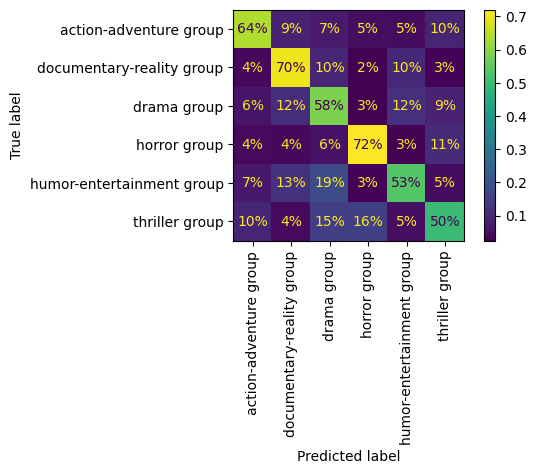

In [ ]:
evaluate_metrics(naive_bayes_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

### SVM Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {"C":[0.01,0.05,0.1,1],
              "penalty":['l2']}

##following set of hyperparameter produces the best result
hyp_params = {'C': [0.05], 'penalty': ['l2']}

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(LinearSVC(class_weight='balanced',random_state=42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train_tfidf,y_train_regrouped)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(class_weight='balanced', random_state=42),
             n_jobs=3, param_grid={'C': [0.05], 'penalty': ['l2']},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'C': 0.05, 'penalty': 'l2'}

- Cross Validation Score :

In [ ]:
best_model =  LinearSVC(C=0.05,penalty='l2',class_weight='balanced',random_state=42)
cv_scores(best_model,X_train_tfidf,y_train_regrouped)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.597, std deviation = 0.005
accuracy : mean = 0.665, std deviation = 0.004


#### Evaluation Metrics

In [ ]:
svc_final = best_model
svc_final.fit(X_train_tfidf,y_train_regrouped)

LinearSVC(C=0.05, class_weight='balanced', random_state=42)

Train accuracy : 0.72
Test accuracy : 0.67

Train macro f1 score : 0.68
Test macro f1 score : 0.60



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.54      0.64      0.58      4221
documentary-reality group       0.80      0.78      0.79     20754
              drama group       0.67      0.62      0.64     14874
             horror group       0.52      0.73      0.60      2204
humor-entertainment group       0.61      0.55      0.58      9734
           thriller group       0.34      0.43      0.38      2413

                 accuracy                           0.67     54200
                macro avg       0.58      0.63      0.60     54200
             weighted avg       0.68      0.67      0.67     54200


Confusion matrix for test data:
(normalized along rows)


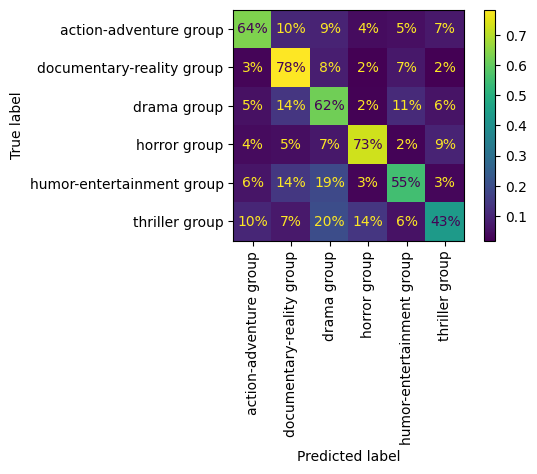

In [ ]:
evaluate_metrics(svc_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

### SGD Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {'alpha': [0.0001,0.001],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log_loss'],
    'learning_rate': ['constant'],
    'eta0': [0.01, 0.1]
              }

##following set of hyperparameter produces the best result
hyp_params = {'alpha': [0.0001],'eta0': [0.1],'learning_rate': ['constant'],
               'loss': ['log_loss'], 'penalty': ['l2']}

stratified_cv = StratifiedKFold(n_splits=5)
sgd = SGDClassifier(class_weight='balanced',random_state=42)
model = GridSearchCV(sgd,
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train_tfidf,y_train_regrouped)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SGDClassifier(class_weight='balanced', random_state=42),
             n_jobs=3,
             param_grid={'alpha': [0.0001], 'eta0': [0.1],
                         'learning_rate': ['constant'], 'loss': ['log_loss'],
                         'penalty': ['l2']},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'alpha': 0.0001,
 'eta0': 0.1,
 'learning_rate': 'constant',
 'loss': 'log_loss',
 'penalty': 'l2'}

- Cross Validation Score :

In [ ]:
best_model = SGDClassifier(alpha=0.0001,eta0=0.1,learning_rate='constant',
                              loss='log_loss',penalty='l2',class_weight='balanced',random_state=42)
cv_scores(best_model,X_train_tfidf,y_train_regrouped)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.599, std deviation = 0.003
accuracy : mean = 0.663, std deviation = 0.003


#### Evaluation Metrics

In [ ]:
sgd_clf_final = best_model
sgd_clf_final.fit(X_train_tfidf,y_train_regrouped)

SGDClassifier(class_weight='balanced', eta0=0.1, learning_rate='constant',
              loss='log_loss', random_state=42)

Train accuracy : 0.70
Test accuracy : 0.66

Train macro f1 score : 0.65
Test macro f1 score : 0.59



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.55      0.61      0.58      4221
documentary-reality group       0.78      0.79      0.78     20754
              drama group       0.64      0.63      0.64     14874
             horror group       0.58      0.68      0.62      2204
humor-entertainment group       0.62      0.51      0.56      9734
           thriller group       0.34      0.46      0.39      2413

                 accuracy                           0.66     54200
                macro avg       0.58      0.61      0.59     54200
             weighted avg       0.67      0.66      0.66     54200


Confusion matrix for test data:
(normalized along rows)


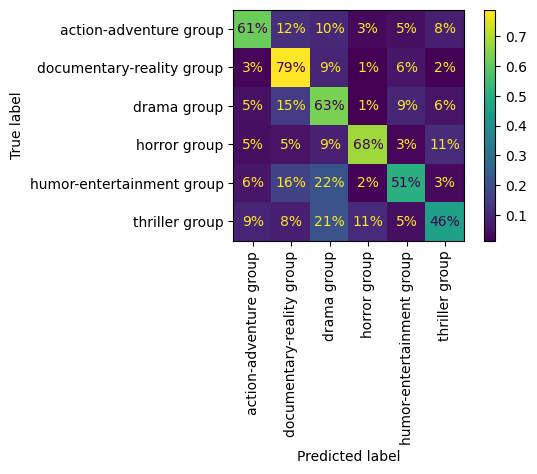

In [ ]:
evaluate_metrics(sgd_clf_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

### Random Forest Classifier

#### Hyperparameter Tuning

In [ ]:
hyp_params = {"n_estimators":[100,200],
                  "max_depth":[10,50,200,None],
                  "min_samples_leaf":[10,100,200,500],
                  'max_features':['sqrt',"log2"]
              }

##following set of hyperparameter produces the best result
hyp_params = {'max_depth': [200], 'min_samples_split': [200], 'n_estimators': [200], 'max_features':["log2"]}

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=42),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train_tfidf,y_train_regrouped)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [200], 'max_features': ['log2'],
                         'min_samples_split': [200], 'n_estimators': [200]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'max_depth': 200,
 'max_features': 'log2',
 'min_samples_split': 200,
 'n_estimators': 200}

In [ ]:
model.best_score_

0.5685477998854522

- Cross Validation Score :

In [ ]:
best_model = RandomForestClassifier(max_depth=200,min_samples_split=200,n_estimators=200,max_features="log2",
                                    class_weight='balanced',random_state=42)
cv_scores(best_model,X_train_tfidf,y_train_regrouped)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.569, std deviation = 0.005
accuracy : mean = 0.644, std deviation = 0.003


#### Evaluation Metrics

Train accuracy : 0.86
Test accuracy : 0.64

Train macro f1 score : 0.87
Test macro f1 score : 0.57



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.54      0.57      0.55      4221
documentary-reality group       0.76      0.79      0.77     20754
              drama group       0.60      0.64      0.62     14874
             horror group       0.55      0.66      0.60      2204
humor-entertainment group       0.58      0.46      0.52      9734
           thriller group       0.39      0.30      0.34      2413

                 accuracy                           0.64     54200
                macro avg       0.57      0.57      0.57     54200
             weighted avg       0.64      0.64      0.64     54200


Confusion matrix for test data:
(normalized along rows)


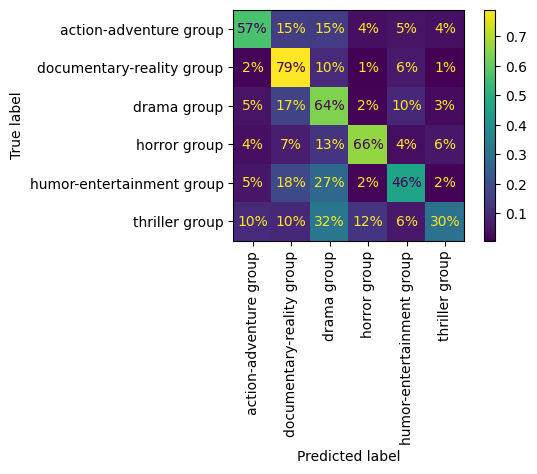

In [ ]:
random_forest_final = best_model
random_forest_final.fit(X_train_tfidf,y_train_regrouped)
evaluate_metrics(random_forest_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

### Light Gradient Boosting Machine

#### Hyper Parameter Tuning

In [ ]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

4.1.0


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGBMClassifier(class_weight='balanced',random_state=42,)

In [ ]:
hyp_params = {#'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1],
              'max_depth': [-1, 10],
              'min_child_samples': [20, 50, 100],
              }

##following set of hyperparameter produces the best result
hyp_params = {'n_estimators': [200],'learning_rate': [0.1],
              'max_depth': [-1],'min_child_samples': [50],
              }

stratified_cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(LGBMClassifier(class_weight='balanced',random_state=42,force_col_wise=True,verbose=0),
                     param_grid=hyp_params,cv=stratified_cv,n_jobs=3,verbose=1,scoring="f1_macro")

In [ ]:
model.fit(X_train_tfidf,y_train_regrouped)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(class_weight='balanced',
                                      force_col_wise=True, random_state=42,
                                      verbose=0),
             n_jobs=3,
             param_grid={'learning_rate': [0.1], 'max_depth': [-1],
                         'min_child_samples': [20, 50, 100],
                         'n_estimators': [200]},
             scoring='f1_macro', verbose=1)

In [ ]:
model.best_params_

{'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 50,
 'n_estimators': 200}

In [ ]:
model.best_score_

0.5844877250983319

- Cross Validation Score :

In [ ]:
best_model = LGBMClassifier(n_estimators=200,learning_rate=0.1,max_depth=-1,min_child_samples=50,
                            class_weight='balanced',random_state=42,force_col_wise=True,verbose=0)

cv_scores(best_model,X_train_tfidf,y_train_regrouped)

Cross validation scores of the model with best hyperparameters:

macro f1 : mean = 0.584, std deviation = 0.004
accuracy : mean = 0.651, std deviation = 0.004


#### Evaluation Metrics

Train accuracy : 0.80
Test accuracy : 0.65

Train macro f1 score : 0.81
Test macro f1 score : 0.59



Classification report for test data:

                           precision    recall  f1-score   support

   action-adventure group       0.49      0.63      0.55      4221
documentary-reality group       0.83      0.73      0.78     20754
              drama group       0.65      0.61      0.63     14874
             horror group       0.57      0.67      0.61      2204
humor-entertainment group       0.57      0.60      0.58      9734
           thriller group       0.32      0.45      0.38      2413

                 accuracy                           0.65     54200
                macro avg       0.57      0.62      0.59     54200
             weighted avg       0.67      0.65      0.66     54200


Confusion matrix for test data:
(normalized along rows)


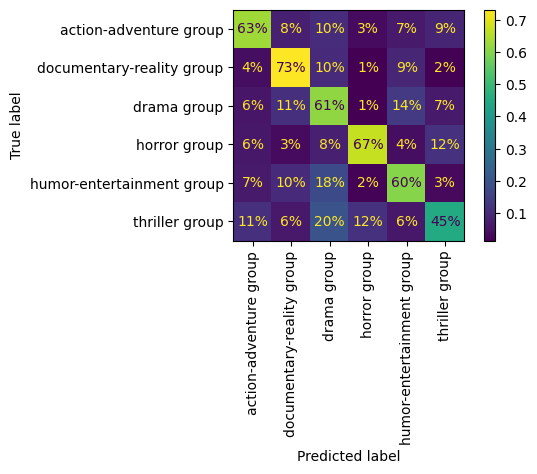

In [ ]:
lightGB_final = best_model
lightGB_final.fit(X_train_tfidf,y_train_regrouped)
evaluate_metrics(lightGB_final,X_train_tfidf,y_train_regrouped,X_test_tfidf,y_test_regrouped)

### Comparing Performance of Different Models

In [ ]:
classifiers = [log_reg_final,naive_bayes_final,svc_final,sgd_clf_final,random_forest_final,lightGB_final]
metrics = {"classifier":["Logistic Regression","Naive Bayes","SVM","SGD","Random Forest","Light Gradient Boost"],
 "Train_accuracy":[round(accuracy_score(y_train_regrouped,m.predict(X_train_tfidf)),3) for  m in classifiers],
 "Test_accuracy":[round(accuracy_score(y_test_regrouped,m.predict(X_test_tfidf)),3) for  m in classifiers],
 "Train_macro_f1_score":[round(f1_score(y_train_regrouped,m.predict(X_train_tfidf),average='macro'),3) for  m in classifiers],
 "Test_macro_f1_score":[round(f1_score(y_test_regrouped,m.predict(X_test_tfidf),average='macro'),3) for  m in classifiers],
}

In [ ]:
pd.DataFrame(metrics)

,classifier,Train_accuracy,Test_accuracy,Train_macro_f1_score,Test_macro_f1_score
0,Logistic Regression,0.738,0.672,0.704,0.600
1,Naive Bayes,0.665,0.626,0.626,0.565
2,SVM,0.722,0.668,0.681,0.597
3,SGD,0.696,0.662,0.651,0.594
4,Random Forest,0.858,0.645,0.867,0.567
5,Light Gradient Boost,0.804,0.653,0.807,0.589


- The Logistic Regression and SVM classifier models demonstrated the most favorable overall performance with approximately 67% accuracy and a ~0.60 f1-score on the test dataset. While the Random Forest model achieved the highest accuracy and f1-score on the training data, it did not generalize well to the test dataset, indicating potential overfitting in the model.

- The documentary-reality group consistently achieved the highest precision, recall, and F1 scores, indicating that movies within this category are easily detectable. In contrast, the thriller group is the most challenging to distinguish.

- Due to the very large dimensions of the dataframes and the constraints imposed by my limited computational resources, I was unable to perform a more rigorous grid search of hyperparameters, which could have further improved the results.



- The results shared thus far mainly relate to the simplified genre classes, consisting of six categories. For completeness, we will now examine the detailed performance of our best model, Logistic Regression, using the original genre labels with all 27 classes.

In [ ]:
log_reg_final = LogisticRegression(C=1,penalty='l2',solver= 'liblinear',class_weight='balanced',random_state=42)
log_reg_final.fit(X_train_tfidf,y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [ ]:
y_train_pred = log_reg_final.predict(X_train_tfidf)

y_test_pred = log_reg_final.predict(X_test_tfidf)

print(f"Train accuracy : {accuracy_score(y_train,y_train_pred):.2f}")
print(f"Test accuracy : {accuracy_score(y_test,y_test_pred):.2f}\n")

print(f"Train macro f1 score : {f1_score(y_train,y_train_pred,average='macro'):.2f}")
print(f"Test macro f1 score : {f1_score(y_test,y_test_pred,average='macro'):.2f}\n")

#For test data only

print("\nClassification report for test data:\n")
print(classification_report(y_test,y_test_pred))

Train accuracy : 0.64
Test accuracy : 0.52

Train macro f1 score : 0.59
Test macro f1 score : 0.37


Classification report for test data:

               precision    recall  f1-score   support

      action        0.36      0.46      0.40      1314
       adult        0.35      0.63      0.45       590
   adventure        0.25      0.33      0.28       775
   animation        0.17      0.28      0.21       498
   biography        0.05      0.12      0.07       264
      comedy        0.62      0.48      0.54      7446
       crime        0.16      0.35      0.22       505
 documentary        0.77      0.67      0.71     13096
       drama        0.69      0.49      0.57     13612
      family        0.18      0.29      0.22       783
     fantasy        0.13      0.30      0.18       322
   game-show        0.51      0.73      0.60       193
     history        0.08      0.20      0.11       243
      horror        0.58      0.68      0.62      2204
       music        0.42      0.69 


Confusion matrix for test data:


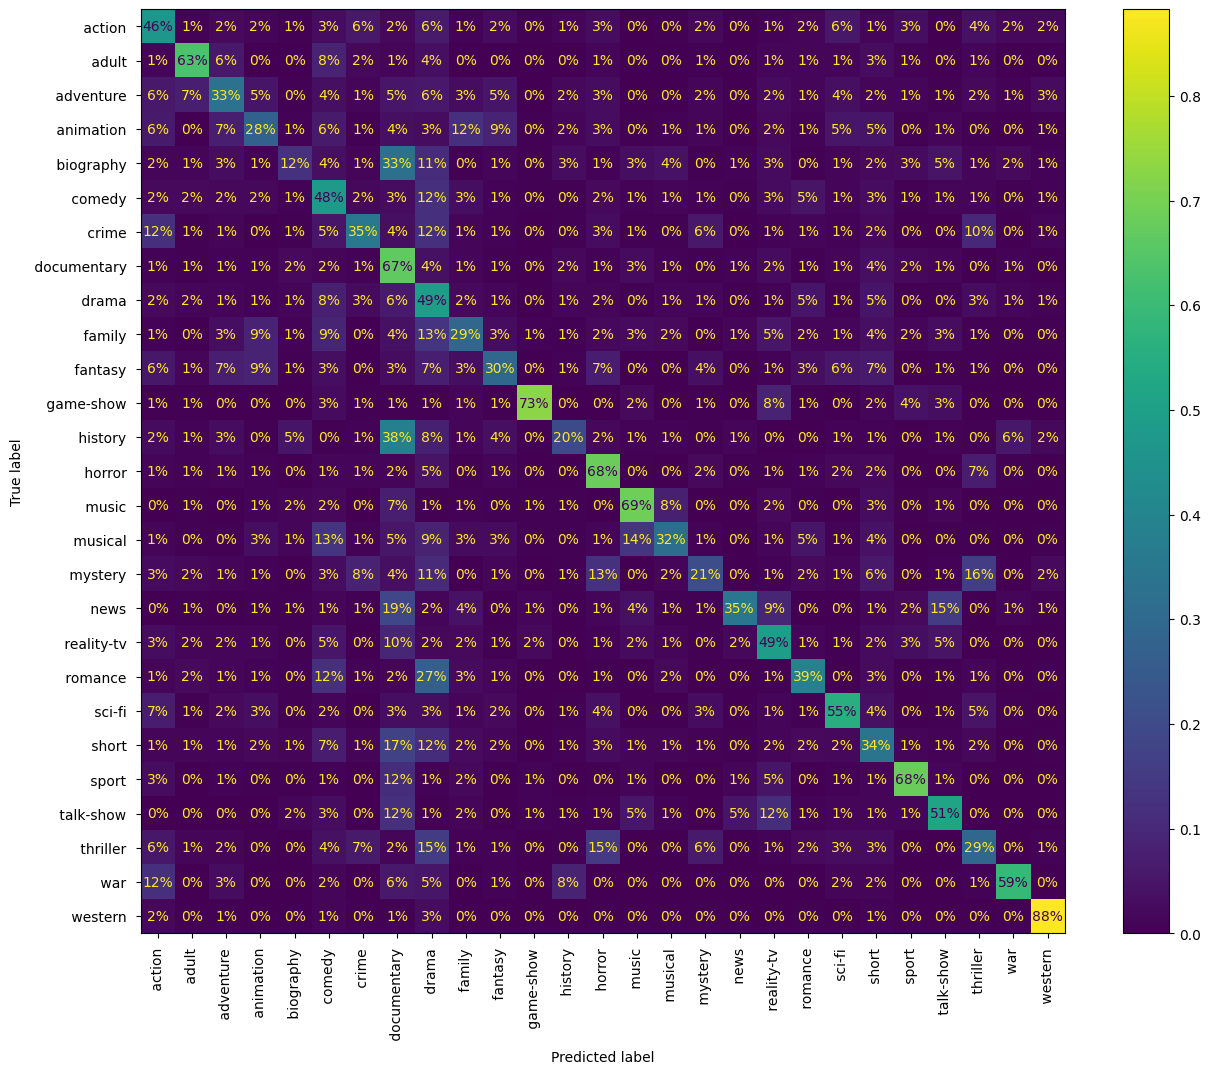

In [ ]:
plt.rcParams["figure.figsize"] = (15,12)
print("\nConfusion matrix for test data:")
dsp = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=log_reg_final.classes_,
                                              normalize='true',values_format=".0%")
plt.xticks(rotation=90)
plt.show()

## Conclusions <a id="conclusions"></a>

- The performance of our machine learning classification models are significantly better than that of the baseline model with dummy classifier. This outcome strongly suggests that machine learning can be a valuable tool for predicting movie genres based on textual information.

- The initial dataset presented a significant challenge due to its target feature, which comprised 27 categories. When applying machine learning models to this original dataset, the overall accuracy was approximately 50%, with an average f1 score of approximately 0.4 on the test data. In response to this challenge,  I decided to reorganize the target classes into a more manageable set of 6 categories. Trained on the revised dataset, our top-performing models, specifically the Logistic Regression and SVM classifier, achieved a significantly higher test data accuracy, ~ 67%, and an average f1 score of ~ 0.60. These results highlight the effectiveness of feature engineering and class reduction in tackling high-dimensional and multiclass classification problems.



- Due to my current constraints in computational resources and knowledge, I am unable to explore more advanced algorithms like deep neural networks, which are known for their strong performance in natural language processing. It's highly likely that further advancements in this project could be achieved with neural networks. Lastly, a more careful grouping of movie genre classes may lead to improved classification results.